In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
type(confirmed_df.head())

pandas.core.frame.DataFrame

In [5]:
'''len(confirmed_df["Country/Region"])'''

'len(confirmed_df["Country/Region"])'

In [6]:
'''for i in range(len(confirmed_df["Country/Region"])):
    print (i, confirmed_df["Country/Region"][i])'''


'for i in range(len(confirmed_df["Country/Region"])):\n    print (i, confirmed_df["Country/Region"][i])'

In [7]:
'''confirmed_df["Country/Region"][236]'''

'confirmed_df["Country/Region"][236]'

In [8]:
print(confirmed_df.loc[[236]])

    Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
236            NaN      Sri Lanka  7.873054  80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/25/21  5/26/21  5/27/21  \
236        0        0        0        1  ...   169900   172277   174861   

     5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  
236   177711   180593   183452   186364  189241  192547  195844  

[1 rows x 503 columns]


In [9]:
sl_confirmed_df = pd.DataFrame(confirmed_df.loc[[236]])

In [10]:
sl_confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
236,NaN,Sri Lanka,7.873054,80.771797,0,0,0,0,0,1,...,169900,172277,174861,177711,180593,183452,186364,189241,192547,195844


In [11]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [12]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,735,742,745,749,757,764,766,772,780,784


In [13]:
print(deaths_df.loc[[236]])

    Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
236            NaN      Sri Lanka  7.873054  80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/25/21  5/26/21  5/27/21  \
236        0        0        0        0  ...     1269     1298     1298   

     5/28/21  5/29/21  5/30/21  5/31/21  6/1/21  6/2/21  6/3/21  
236     1363     1363     1441     1441    1484    1566    1608  

[1 rows x 503 columns]


In [14]:
sl_deaths_df = pd.DataFrame(deaths_df.loc[[236]])

In [15]:
sl_deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
236,NaN,Sri Lanka,7.873054,80.771797,0,0,0,0,0,0,...,1269,1298,1298,1363,1363,1441,1441,1484,1566,1608


In [16]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-31-2021.csv')

In [17]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-06-01 04:23:09,33.93911,67.709953,71838,2944,57629.0,11265.0,Afghanistan,184.539074,4.098110
1,NaN,NaN,NaN,Albania,2021-06-01 04:23:09,41.15330,20.168300,132315,2451,129431.0,433.0,Albania,4597.783029,1.852398
2,NaN,NaN,NaN,Algeria,2021-06-01 04:23:09,28.03390,1.659600,128913,3472,89839.0,35602.0,Algeria,293.979325,2.693289
3,NaN,NaN,NaN,Andorra,2021-06-01 04:23:09,42.50630,1.521800,13727,127,13458.0,142.0,Andorra,17766.129554,0.925184
4,NaN,NaN,NaN,Angola,2021-06-01 04:23:09,-11.20270,17.873900,34551,766,28079.0,5706.0,Angola,105.126022,2.217013


In [18]:
'''for i in range(len(latest_data.Country_Region)):
    print (i,latest_data.Country_Region[i])'''

'for i in range(len(latest_data.Country_Region)):\n    print (i,latest_data.Country_Region[i])'

In [19]:
latest_data.Country_Region[618]

'Sri Lanka'

In [20]:
print(latest_data.loc[[618]])

     FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
618   NaN    NaN            NaN      Sri Lanka  2021-06-01 04:23:09  7.873054   

         Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
618  80.771797     186364    1441   151740.0  33183.0    Sri Lanka   

     Incident_Rate  Case_Fatality_Ratio  
618     870.320946             0.773218  


In [21]:
sl_latest_data = pd.DataFrame(latest_data.loc[[618]])

In [22]:
sl_latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
618,NaN,NaN,NaN,Sri Lanka,2021-06-01 04:23:09,7.873054,80.771797,186364,1441,151740.0,33183.0,Sri Lanka,870.320946,0.773218


In [23]:
cols = sl_confirmed_df.keys()

In [24]:
#Get all the dates for the ongoing coronavirus pandemic


In [25]:
sl_confirmed = sl_confirmed_df.loc[:, cols[4]:cols[-1]]
sl_deaths = sl_deaths_df.loc[:, cols[4]:cols[-1]]

In [26]:
dates = sl_confirmed.keys()
sl_cases = []
sl_total_deaths = [] 
sl_mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    sl_confirmed_sum = sl_confirmed[i].sum()
    sl_death_sum = sl_deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    sl_cases.append(sl_confirmed_sum)
    sl_total_deaths.append(sl_death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    sl_mortality_rate.append(sl_death_sum/sl_confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

<ipython-input-26-6f9bef710ffd>:21: RuntimeWarning: invalid value encountered in long_scalars
  sl_mortality_rate.append(sl_death_sum/sl_confirmed_sum)


In [26]:


#Getting daily increases and moving averages


In [27]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(sl_cases)
world_confirmed_avg= moving_average(sl_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(sl_total_deaths)
world_death_avg = moving_average(sl_total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
# world_active_avg = moving_average(total_active, window)



In [28]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
sl_cases = np.array(sl_cases).reshape(-1, 1)
sl_total_deaths = np.array(sl_total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

In [29]:
#Future forcasting

In [27]:
days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-20]

In [31]:
#Convert integer into datetime for better visualization


In [32]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [33]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], sl_cases[50:], test_size=0.03, shuffle=False) 


In [34]:
#Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. We will show the results in the later section.


In [35]:
#bla bla bla bla bla

In [36]:

#Worldwide Overview

#Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 

In [37]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

In [38]:
len(sl_cases)

497

In [39]:
len(sl_total_deaths)

497

In [40]:
len(adjusted_dates)

497

In [41]:
len(future_forcast_dates)

517

In [42]:
len(sl_cases)

497

In [43]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [44]:
# svm_search.best_params_

In [45]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 37272.77542339819
MSE: 1454845289.9033291


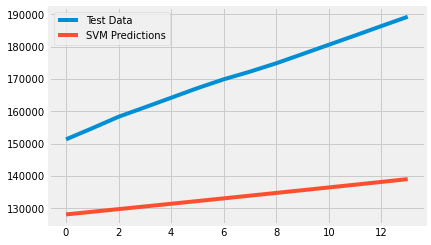

In [46]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [47]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [48]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 43623.933018763484
MSE: 2000439220.9114995


In [49]:
print(linear_model.coef_)

[[-2.93761749e+04  7.99290906e+02 -6.70685457e+00  2.10700041e-02
  -1.91399058e-05]]


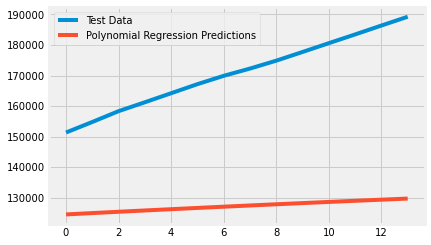

In [50]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [51]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished
/home/manodya/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [52]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': True,
 'lambda_2': 1e-05,
 'lambda_1': 0.001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-05}

In [53]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 45581.084474776304
MSE: 2185668712.2925806


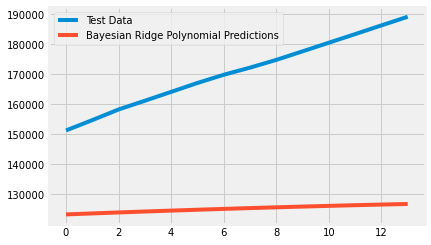

In [54]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [55]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [56]:
len(bayesian_pred[-20:-1])

19

In [57]:
len(svm_pred)

517

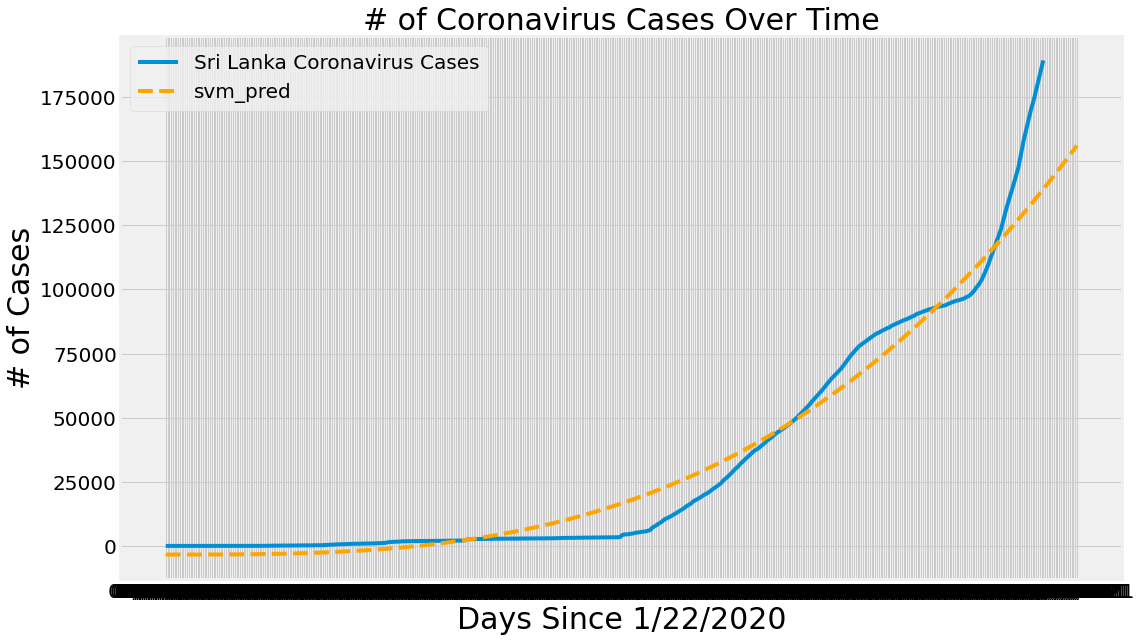

In [58]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(future_forcast_dates[0:-20], sl_cases)
plt.plot(future_forcast_dates[0:-1], svm_pred[0:-1], linestyle='dashed', color='orange')
#plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Cases', 'svm_pred'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



In [60]:
len(adjusted_dates)

497

In [61]:
len(sl_cases)

497

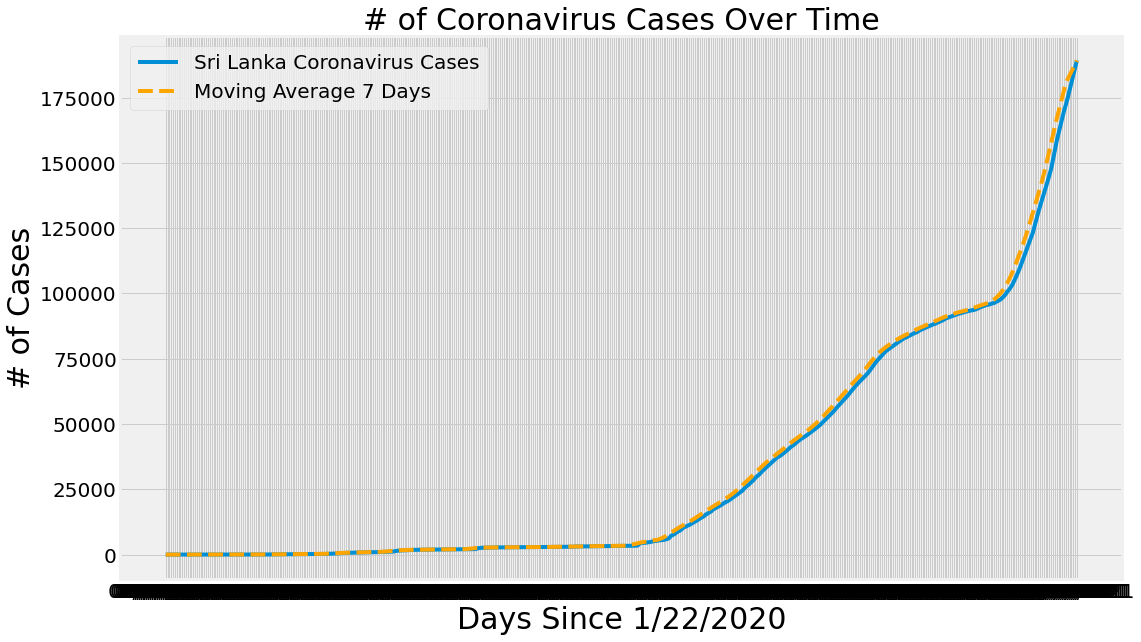

In [62]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(future_forcast_dates[0:-20], sl_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



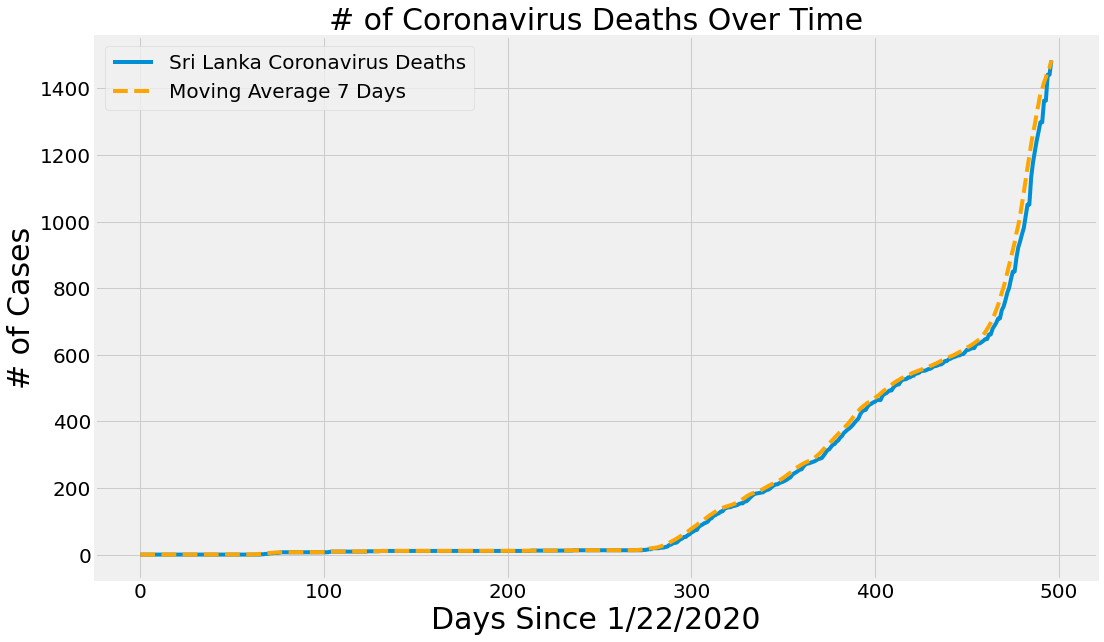

In [68]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, sl_total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Sri Lanka Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [28]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    #plt.figure(figsize=(16, 10))
    #plt.plot(x, y1)
    #plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    #plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    #plt.title('{} Confirmed Cases'.format(country), size=30)
    #plt.xlabel('Days Since 1/22/2020', size=30)
    #plt.ylabel('# of Cases', size=30)
    #plt.xticks(size=20)
    #plt.yticks(size=20)
    #plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#    plt.figure(figsize=(16, 10))
#    plt.bar(x, y4)
#    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
#    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
#    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
#    plt.xlabel('Days Since 1/22/2020', size=30)
#    plt.ylabel('# of Cases', size=30)
#    plt.xticks(size=20)
#    plt.yticks(size=20)
#    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

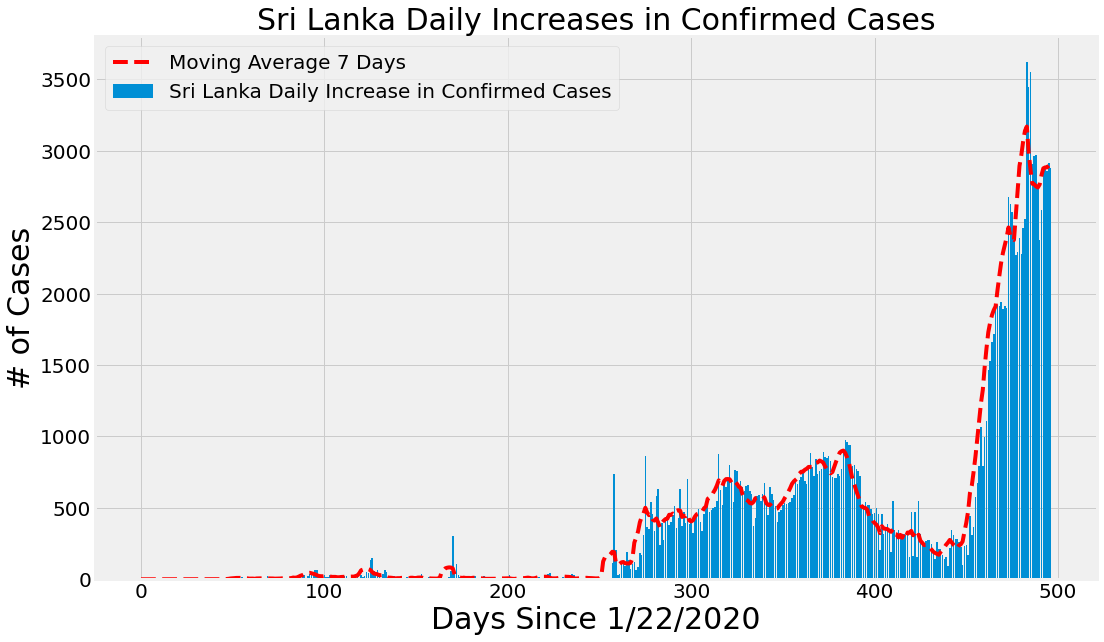

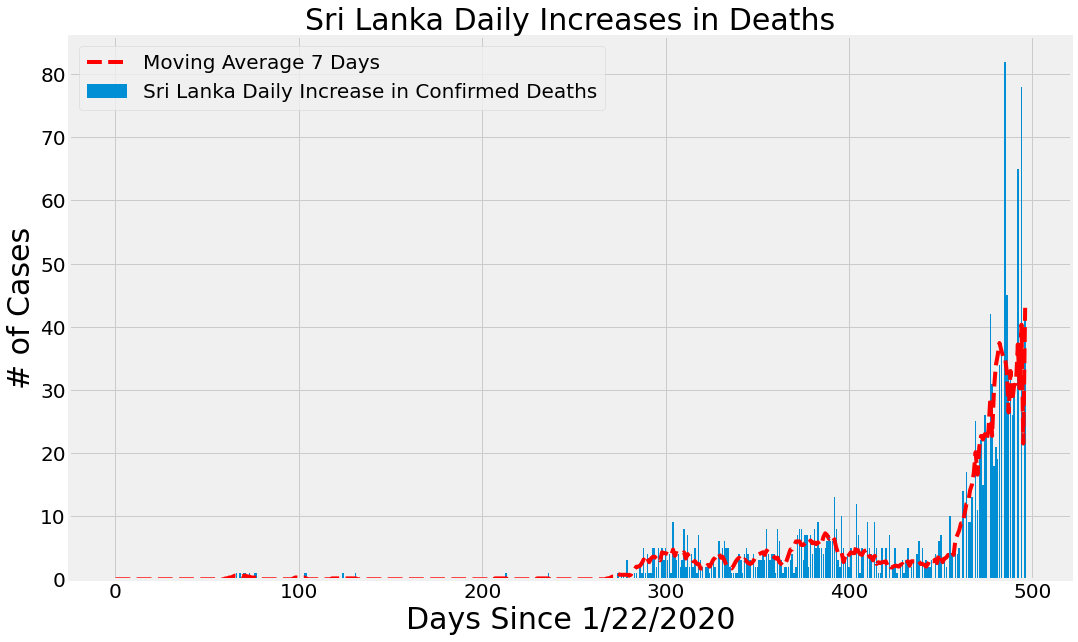

In [81]:
country_visualizations('Sri Lanka')

In [50]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/25/21', '5/26/21', '5/27/21', '5/28/21', '5/29/21', '5/30/21',
       '5/31/21', '6/1/21', '6/2/21', '6/3/21'],
      dtype='object', length=499)

In [64]:
#######TRYING ARIMA ######

In [29]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-29-59ea81e6ce0e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [30]:
#a.index = series.index.to_period('M')
# split into train and test sets
X = a.values
size = int(len(X) * 0.4)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

NameError: name 'a' is not defined

In [31]:
pyplot.plot(test)

NameError: name 'test' is not defined

In [457]:
len(test)

299

In [458]:
len(train)

198

In [49]:
a.values


NameError: name 'a' is not defined

In [57]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append([data[i][0],data[0][1]])
        else:
            d.append([data[i][0],data[i][1]-data[i-1][1]])
    return d 


    
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append([(datetime.strptime(i, '%m/%d/%y')).date(),confirmed_df[confirmed_df['Country/Region']==country_name][i].sum()])
        country_deaths.append([(datetime.strptime(i, '%m/%d/%y')).date(),deaths_df[deaths_df['Country/Region']==country_name][i].sum()])
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)

    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    return (adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

In [58]:
adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name = country_visualizations('Sri Lanka')

In [59]:
country_cases_df = pd.DataFrame(country_cases, columns=['Date','cases'])
country_daily_increase_df = pd.DataFrame(country_daily_increase, columns=['Date','cases'])
country_daily_death_df = pd.DataFrame(country_daily_death, columns=['Date','cases'])



In [60]:
country_cases_df

,Date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
494,2021-05-30,183452
495,2021-05-31,186364
496,2021-06-01,189241
497,2021-06-02,192547


In [61]:
a=country_daily_increase_df['cases'].squeeze()

In [58]:
print(type(a))

<class 'pandas.core.series.Series'>


In [35]:
#GEEK

In [36]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
country_daily_increase_df.set_index('Date')

NameError: name 'country_daily_increase_df' is not defined

In [44]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import timedelta


/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


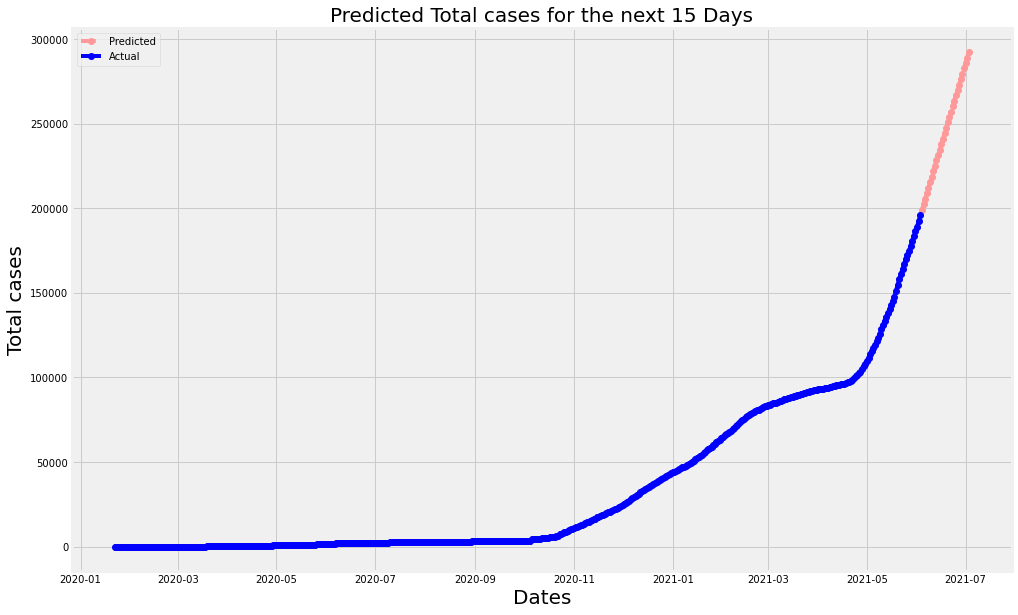

In [110]:

arima = ARIMA(country_cases_df['cases'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = country_cases_df['Date'].iloc[-1]
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

fig=plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Total cases for the next 15 Days" , fontsize = 20)

obj, = plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
obj, = plt.plot_date(y=country_cases_df['cases'],x=country_cases_df['Date'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();


html_str = mpld3.fig_to_html(fig)
mpld3.save_html(fig,"figure1.html")

#Html_file= open("index.html","w")
#Html_file.write(html_str)
#Html_file.close()

#obj, = plt.plot([3,1,4,1,5])


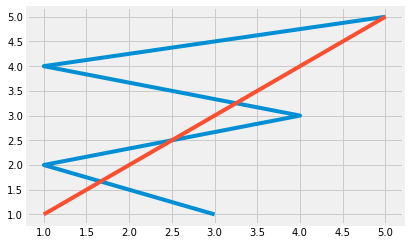

In [108]:
import matplotlib.pyplot as plt, mpld3
fig = plt.figure()
obj, = plt.plot([3,1,4,1,5],[1,2,3,4,5])
obj, = plt.plot([1,2,3,4,5],[1,2,3,4,5])
mpld3.save_html(fig,"figure1.html")

In [63]:
type(country_daily_increase_df['Date'])

pandas.core.series.Series

In [73]:
country_daily_increase_df['Date'][0]

datetime.date(2020, 1, 22)

In [64]:
type(country_daily_increase_df['Date'])

pandas.core.series.Series

/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


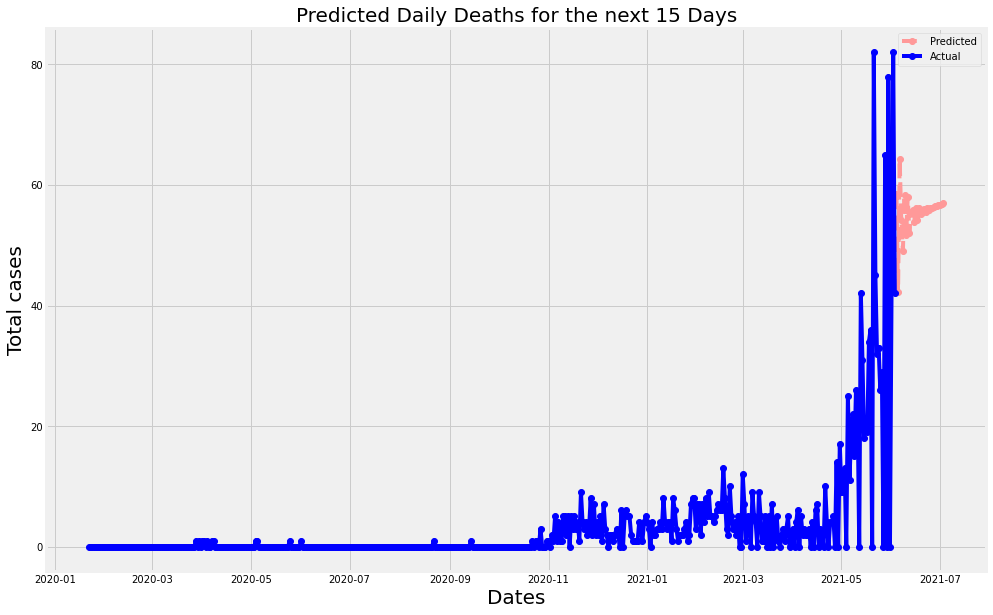

In [111]:

arima = ARIMA(country_daily_death_df['cases'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = country_daily_death_df['Date'].iloc[-1]
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Daily Deaths for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=country_daily_death_df['cases'],x=country_daily_death_df['Date'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();
#plt.savefig('test.png')


<Figure size 432x288 with 0 Axes>

In [65]:
import mpld3